# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [9]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [10]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad


1. В какой шкале представлены все признаки в наборе?

Номинальная – checking_status, personal_status, other_parties, property_magnitude, housing, own_telephone, foreign_worker, class, credit_history, job, employment

Абсолютная – duration, credit_amount, residence_since, age, num_dependents, existing_credits


2. Укажите признак с наименьшей дисперсией
num_dependents

In [ ]:
credit_df.describe()

In [11]:
credit_df.var()

duration            1.465e+02
credit_amount       8.061e+06
residence_since     1.351e+00
age                 1.315e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

In [5]:
min(credit_df.var())

0.12330538922155689

3. Среднее какого признака отличается для двух классов сильнее всего? 
Credit_amount

In [12]:
credit_df.groupby('class').std().diff().abs().max()

duration               2.400
credit_amount       1540.270
residence_since        0.039
age                    0.822
existing_credits       0.002
num_dependents         0.014
dtype: float64

4. В каком классе больше всего skilled работников?
good

In [13]:
credit_df.groupby('class')['job'].apply(lambda x: (x=='skilled').sum()).reset_index(name='count')

,class,count
0,bad,80
1,good,232


5. Есть ли в наборе признаки с выбросами? Какие?
credit_amount

<AxesSubplot:>

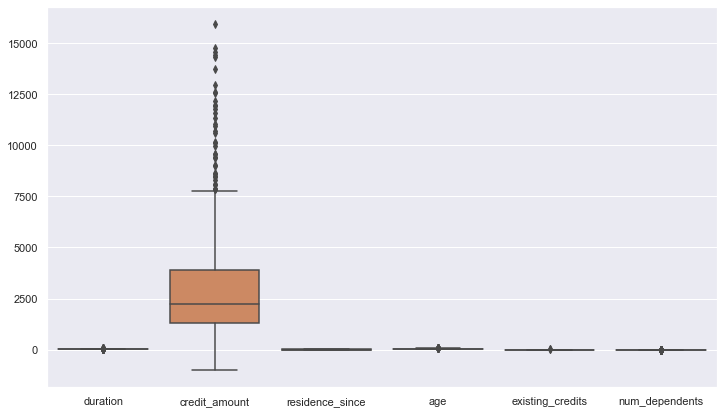

In [14]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

<AxesSubplot:xlabel='credit_amount'>

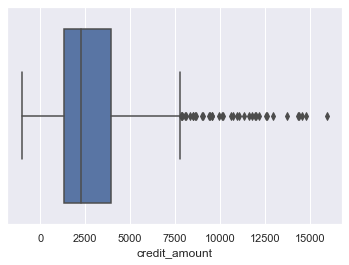

In [15]:
sns.boxplot(x='credit_amount', data=credit_df)

6. Сколько пропущенных значений в наборе?
2 - credit_amount, residence_since

In [21]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
other_parties         0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

In [20]:
(credit_df == 0).sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
other_parties         0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

In [18]:
credit_df.min()

checking_status                        0<=X<200
duration                                    4.0
credit_history                         all paid
credit_amount                            -999.0
employment                               1<=X<4
personal_status              female div/dep/mar
other_parties                      co applicant
residence_since                            -1.0
property_magnitude                          car
age                                        19.0
housing                                for free
existing_credits                            1.0
job                   high qualif/self emp/mgmt
num_dependents                              1.0
own_telephone                              none
foreign_worker                               no
class                                       bad
dtype: object

In [23]:
zero_columns = list (set(['credit_amount','residence_since']))
(credit_df[zero_columns]<0).sum()

credit_amount      6
residence_since    5
dtype: int64

7. Попытайтесь заполнить пропущенные значения.

In [ ]:
credit_df['credit_amount'] = credit_df.apply(
    lambda row: credit_df['credit_amount'].mean() if (row['credit_amount']<0) else row['credit_amount'],
    axis=1
)
credit_df['credit_amount']

In [ ]:
credit_df['residence_since'] = credit_df.apply(
    lambda row: credit_df['residence_since'].mean() if (row['residence_since']<0) else row['residence_since'],
    axis=1
)
credit_df['residence_since']

8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

array([[<AxesSubplot:title={'center':'credit_amount'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

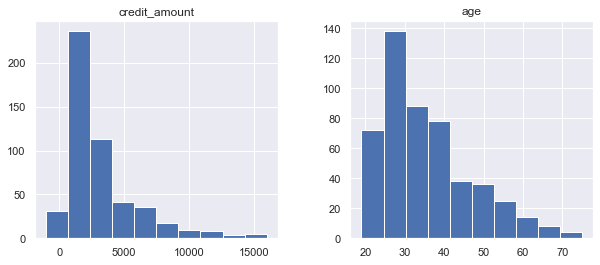

In [29]:
credit_df[['credit_amount','age']].hist(figsize=(10, 4))

<AxesSubplot:xlabel='credit_history', ylabel='count'>

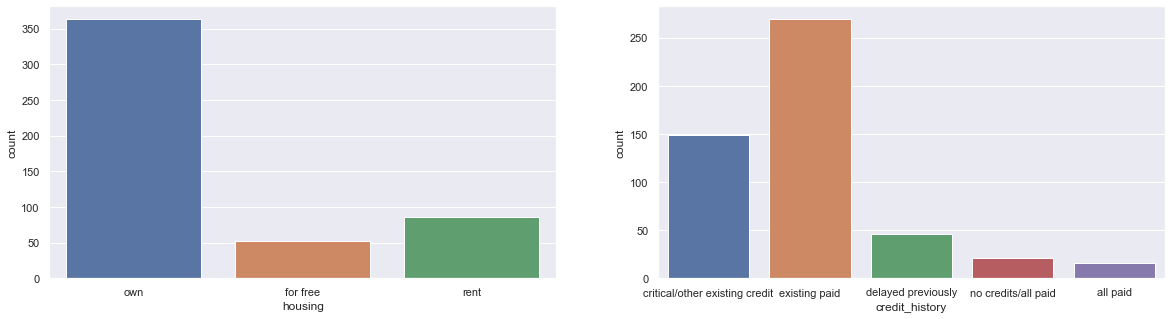

In [34]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.countplot(x='housing', data=credit_df, ax=axes[0])
sns.countplot(x='credit_history', data=credit_df, ax=axes[1])

Качественные признаки

In [26]:
pd.crosstab(credit_df['class'], credit_df['job'], margins=True)

job,high qualif/self emp/mgmt,skilled,unemp/unskilled non res,unskilled resident,All
class,,,,,
bad,33,80,4,20,137
good,49,232,7,76,364
All,82,312,11,96,501


<AxesSubplot:xlabel='class', ylabel='count'>

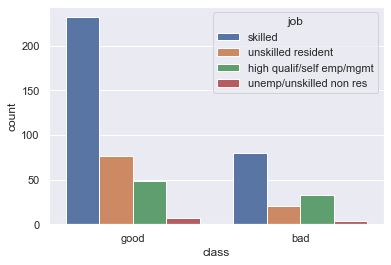

In [27]:
sns.countplot(x='class', hue='job', data=credit_df)

In [ ]:
Количественные

Text(0, 0.5, 'duration')

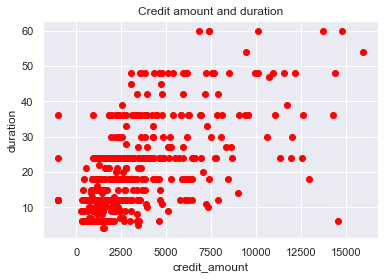

In [28]:
plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='red')
plt.title('Credit amount and duration')
plt.xlabel('credit_amount')
plt.ylabel('duration')

9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

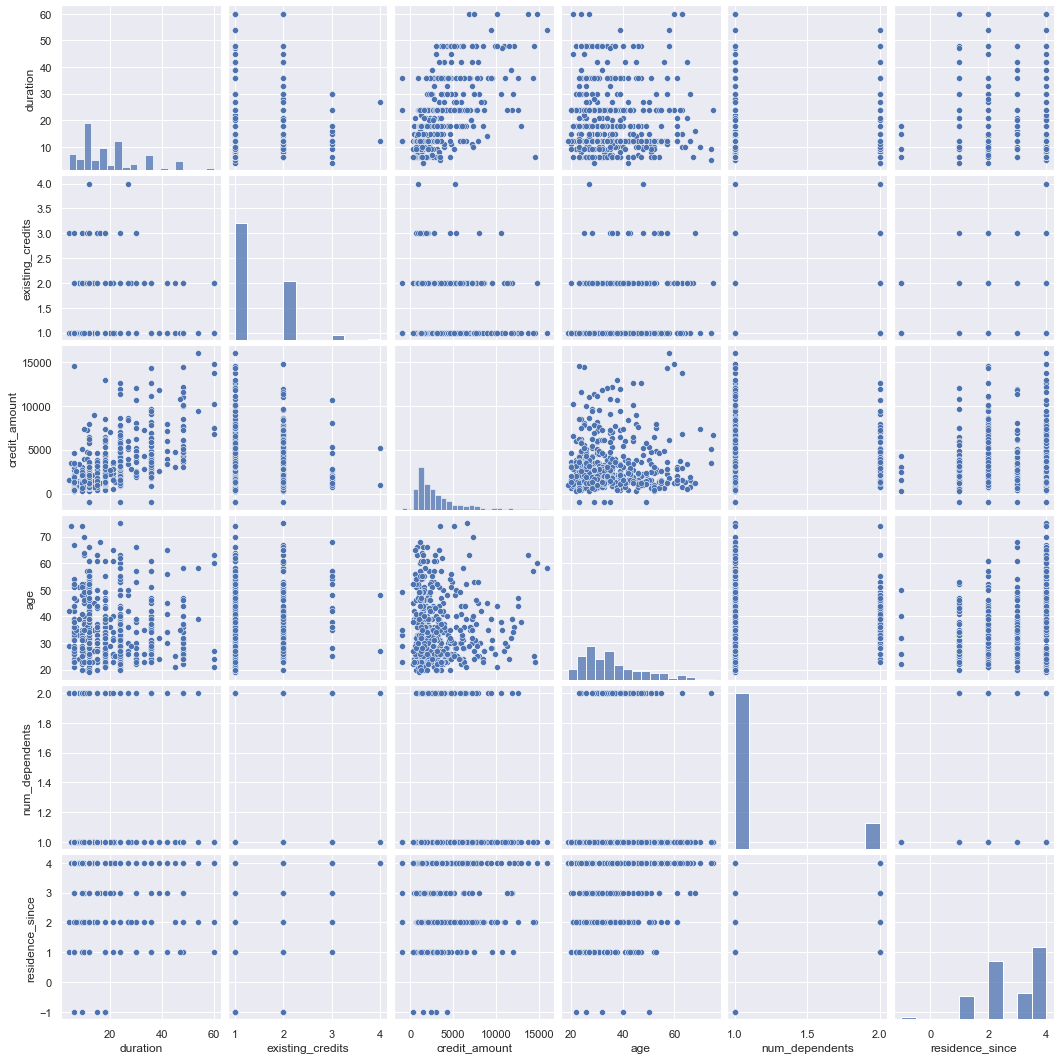

In [35]:
num_columns = list(set(['duration','credit_amount','residence_since','age','existing_credits','num_dependents']))
sns.pairplot(credit_df[num_columns])

In [36]:
corr_matrix = credit_df[num_columns].corr()
corr_matrix

,duration,existing_credits,credit_amount,age,num_dependents,residence_since
duration,1.000,-0.031,0.604,-0.032,-0.014,0.062
existing_credits,-0.031,1.000,0.024,0.147,0.107,0.066
credit_amount,0.604,0.024,1.000,0.027,0.029,0.042
age,-0.032,0.147,0.027,1.000,0.112,0.314
num_dependents,-0.014,0.107,0.029,0.112,1.000,0.087
residence_since,0.062,0.066,0.042,0.314,0.087,1.000


<AxesSubplot:>

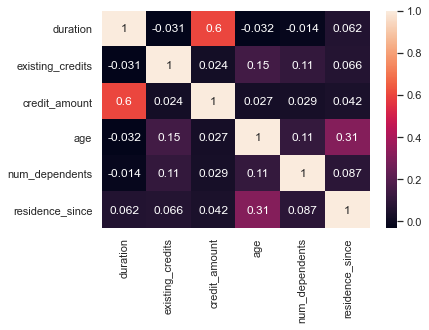

In [37]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

Text(0, 0.5, 'duration')

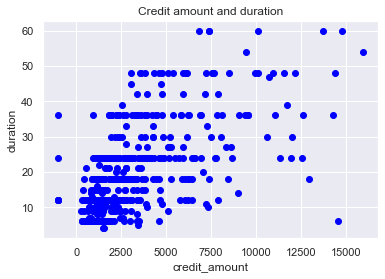

In [38]:
plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='blue')
plt.title('Credit amount and duration')
plt.xlabel('credit_amount')
plt.ylabel('duration')

10. Какой признак(и) имеет смысл стандартизировать? Почему?
credit_amount

11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.
Образование